In [198]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

Proof that reducing r^2 gives a hebbian learning rule. also, Es are reduced when weights are random. For Scalars

In [1030]:
U1 = nn.Linear(1,1, bias=True)
# U2 = nn.Linear(1,1, bias=False)

# def step(x, e1, r1, e2, r2):
def step(x, e1, r1):
    with torch.no_grad():
        e1 = x - torch.matmul(U1.weight.T, r1)
        if U1.bias is not None:
            e1 = e1 + U1.bias
        # e2 = r1 - torch.matmul(U2.weight.T, r2)
    r1 = r1 + U1(e1) 
    # r2 = r2 + U2(e2)
    # return e1, r1, e2, r2
    return e1, r1

In [1056]:
x = torch.rand(1)
e1 = torch.rand(1)
r1 = torch.rand(1)
# e2 = torch.rand(1)
# r2 = torch.rand(1)

# print all
print(f"x: {x}")
print(f"e1: {e1}")
print(f"r1: {r1}")
# print(f"e2: {e2}")
# print(f"r2: {r2}")

x: tensor([0.3278])
e1: tensor([0.6532])
r1: tensor([0.3958])


In [1078]:
e1 = e1.detach()
r1 = r1.detach()
# e2 = e2.detach()
# r2 = r2.detach()
# e1, r1, e2, r2 = step(x, e1, r1, e2, r2)
e1, r1 = step(x, e1, r1)
print(f" x: {x}")
print(f"e1: {e1}")
print(f"r1: {r1}")
print(f"Ur1: {torch.matmul(U1.weight.T, r1)}")
# print(f"e2: {e2}")
# print(f"r2: {r2}")

 x: tensor([0.3278])
e1: tensor([0.9079])
r1: tensor([-1.6491], grad_fn=<AddBackward0>)
Ur1: tensor([-1.2906], grad_fn=<MvBackward0>)


In [15]:
with torch.no_grad():
    U1.weight.grad = torch.zeros_like(U1.weight)
    U2.weight.grad = torch.zeros_like(U2.weight)
loss = 0.5*((r1**2).sum() + (r2**2).sum())
loss.sum().backward()
print(f'U1.weight.grad:\n{U1.weight.grad}')
print(f'U2.weight.grad:\n{U2.weight.grad}')

U1.weight.grad:
tensor([[0.0049]])
U2.weight.grad:
tensor([[0.0075]])


In [17]:
print(f'1:\n{torch.matmul(e1.unsqueeze(1), r1.unsqueeze(1).T).T}')
print(f'2:\n{torch.matmul(e2.unsqueeze(1), r2.unsqueeze(1).T).T}')

1:
tensor([[0.0049]], grad_fn=<PermuteBackward0>)
2:
tensor([[0.0075]], grad_fn=<PermuteBackward0>)


Expansion to Vector Es and Rs

In [256]:
torch.manual_seed(42)
# Converges to zero if i+1 is > i, but explodes if i+1 >> i. Converges to poor minima if i+1 < i
sizes = [2, 8, 16]
U1 = nn.Linear(sizes[0],sizes[1], bias=False)
# U1.weight.data = torch.ones_like(U1.weight.data)
# U1.weight.data /= U1.weight.data.norm()
U2 = nn.Linear(sizes[1], sizes[2], bias=False)
# U2.weight.data = torch.ones_like(U2.weight.data) / 24.0
# U2.weight.data /= U2.weight.data.norm()

print(U1.weight)
u1mag = (U1.weight.data @ U1.weight.data.T).norm()
print(u1mag)
print(U2.weight)
u2mag = (U2.weight.data @ U2.weight.data.T).norm()
print(u2mag)

# def step(x, e1, r1, e2, r2):
#     with torch.no_grad():
#         e1 = x - torch.matmul(U1.weight.T, r1)
#     r1 = r1 + U1(e1) 
#     with torch.no_grad():
#         # r1 -= (0.01*e2)
#         e2 = r1 - torch.matmul(U2.weight.T, r2)
#     r2 = r2 + U2(e2)
#     return e1, r1, e2, r2
def step(x, e1, r1, e2, r2):
    with torch.no_grad():
        e1 = x - torch.matmul(U1.weight.T, r1)
        e2 = r1 - torch.matmul(U2.weight.T, r2)
    r1 = r1 + U1(e1)
    r2 = r2 + U2(e2)
    return e1, r1, e2, r2

# def step(x, e1, r1, e2, r2):
#     with torch.no_grad():
#         e1 = torch.matmul(U1.weight.T, r1) - x
#     r1 = r1 - U1(e1) 
#     with torch.no_grad():
#         e2 = torch.matmul(U2.weight.T, r2) - r1
#     r2 = r2 - U2(e2)
#     return e1, r1, e2, r2

Parameter containing:
tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188],
        [ 0.6146,  0.1323],
        [ 0.5224,  0.0958],
        [ 0.3410, -0.0998]], requires_grad=True)
tensor(2.0695)
Parameter containing:
tensor([[ 0.2725,  0.0523, -0.1651,  0.0901, -0.1629, -0.0415, -0.1436,  0.2345],
        [-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003],
        [ 0.2730,  0.0588, -0.1148,  0.2185,  0.0551,  0.2857,  0.0387, -0.1115],
        [ 0.0950, -0.0959,  0.1488,  0.3157,  0.2044, -0.1546,  0.2041,  0.0633],
        [ 0.1795, -0.2155, -0.3500, -0.1366, -0.2712,  0.2901,  0.1018,  0.1464],
        [ 0.1118, -0.0062,  0.2767, -0.2512,  0.0223, -0.2413,  0.1090, -0.1218],
        [ 0.1083, -0.0737,  0.2932, -0.2096, -0.2109, -0.2109,  0.3180,  0.1178],
        [ 0.3402, -0.2918, -0.3507, -0.2766, -0.2378,  0.1432,  0.1266,  0.2938],
        [-0.1826, -0.2410,  0.1876, -0.1

In [257]:
x = torch.rand(sizes[0])
e1 = torch.rand(sizes[0])
r1 = torch.rand(sizes[1])
e2 = torch.rand(sizes[1])
r2 = torch.rand(sizes[2])

# print all
# print(f"x: {x}")
# print(f"e1: {e1}")
# print(f"r1: {r1}")
# print(f"e2: {e2}")
# print(f"r2: {r2}")

e1s = []
e2s = []
steps = []
step_i = 0

e1 abs mean: 0.00
r1 abs mean: 0.36
e2 abs mean: 0.00
r2 abs mean: 0.47
tensor([ 1.6242e-05, -6.7949e-06])
tensor([ 0.0041,  0.0090, -0.0036, -0.0021,  0.0029, -0.0024,  0.0064, -0.0053])


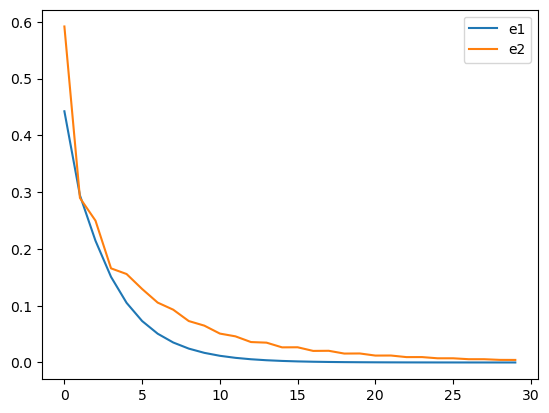

In [258]:
e1 = e1.detach()
r1 = r1.detach()
e2 = e2.detach()
r2 = r2.detach()

for _ in range(30):
    e1, r1, e2, r2 = step(x, e1, r1, e2, r2)
    e1s.append(e1.abs().mean())
    e2s.append(e2.abs().mean())
    steps.append(step_i)
    step_i += 1
# print(f" x: {x}")
print(f"e1 abs mean: {e1.abs().mean():.2f}")
print(f"r1 abs mean: {r1.abs().mean():.2f}")
print(f"e2 abs mean: {e2.abs().mean():.2f}")
print(f"r2 abs mean: {r2.abs().mean():.2f}")
print(e1)
print(e2)

plt.plot(steps, e1s, label="e1")
plt.plot(steps, e2s, label="e2")
plt.legend()



In [177]:
r21 = r1
r22 = r2

In [178]:
r1 = (r11 - r21)
r2 = (r12 - r22)

In [179]:
r1.abs().mean(), r2.abs().mean()

(tensor(1.0249, grad_fn=<MeanBackward0>),
 tensor(2.5901, grad_fn=<MeanBackward0>))

In [181]:
r2.max()

tensor(7.9766, grad_fn=<MaxBackward1>)

In [74]:
with torch.no_grad():
    U1.weight.grad = torch.zeros_like(U1.weight)
    U2.weight.grad = torch.zeros_like(U2.weight)
loss = 0.5*((r1**2).sum() + (r2**2).sum())
loss.sum().backward()
print(f'U1.weight.grad:\n{U1.weight.grad}')
print(f'U2.weight.grad:\n{U2.weight.grad}')

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [198]:
print(f'1:\n{torch.matmul(e1.unsqueeze(1), r1.unsqueeze(1).T).T}')
print(f'2:\n{torch.matmul(e2.unsqueeze(1), r2.unsqueeze(1).T).T}')

1:
tensor([[-0.6933,  0.4221],
        [-0.3558,  0.2166],
        [-0.3064,  0.1865],
        [ 0.1959, -0.1192]], grad_fn=<PermuteBackward0>)
2:
tensor([[-0.3013, -0.6518, -0.1750,  0.1821],
        [-0.2382, -0.5154, -0.1384,  0.1440],
        [-0.3859, -0.8350, -0.2242,  0.2333],
        [-0.1283, -0.2775, -0.0745,  0.0776],
        [-0.1763, -0.3815, -0.1024,  0.1066],
        [ 0.0057,  0.0124,  0.0033, -0.0035]], grad_fn=<PermuteBackward0>)


In [274]:
U = nn.Conv2d(1, 3, (3,3), bias=False)
optimiser = torch.optim.SGD(U.parameters(), lr=0.001)
Ut = nn.ConvTranspose2d(3, 1, (3,3))
with torch.no_grad():
    Ut.weight = U.weight
grad = torch.zeros_like(U.weight)
def step(x, e, r):
    with torch.no_grad():
        e = x - Ut(r)
    r = r + U(e)
    return e, r

In [275]:
x = torch.rand((1,1,4,4))
e = torch.zeros_like(x)
r = torch.zeros((1,3,2,2))

In [294]:
e = e.detach()
r = r.detach()
e, r = step(x, e, r)
print(e)
print(r)

tensor([[[[ 0.5686, -0.0906,  0.0353,  0.2347],
          [ 0.3378,  0.1243, -0.1070, -0.0324],
          [ 0.2056,  0.1212, -0.0081, -0.0222],
          [ 0.0375,  0.0403,  0.0899,  0.0199]]]])
tensor([[[[ 0.3041,  0.3235],
          [-0.1773, -0.0444]],

         [[-0.0907, -1.0017],
          [ 0.0183, -0.6439]],

         [[ 0.6487,  1.1892],
          [-0.4736, -0.6325]]]], grad_fn=<AddBackward0>)


In [295]:
optimiser.zero_grad()
loss = (0.5*(r**2)).sum()
print(loss)
loss.backward()
optimiser.step()

tensor(2.0582, grad_fn=<SumBackward0>)


In [296]:
U.weight.grad

tensor([[[[ 0.0782, -0.0334,  0.1071],
          [ 0.1011, -0.0180, -0.0406],
          [ 0.0933,  0.0231, -0.0265]]],


        [[[-0.0347,  0.0440, -0.2194],
          [-0.2294,  0.1033,  0.0563],
          [-0.1653, -0.0601,  0.0118]]],


        [[[ 0.0226, -0.0079,  0.3732],
          [ 0.1929, -0.0989, -0.0901],
          [ 0.2343, -0.0069, -0.0868]]]])